In [655]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score



In [656]:
bnk=pd.read_csv("Bank_Customer_Churn.csv")

In [657]:
bnk.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [658]:
bnk['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [659]:
bnk.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


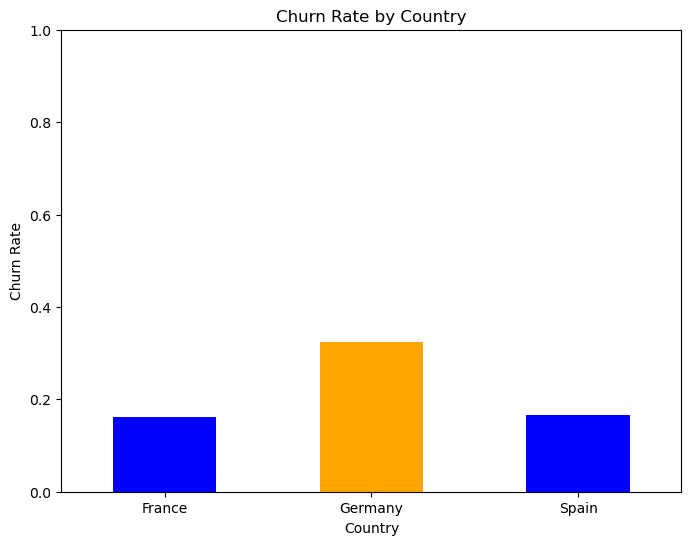

In [660]:
churn_rate = bnk.groupby('country')['churn'].mean()

plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)  
plt.show()

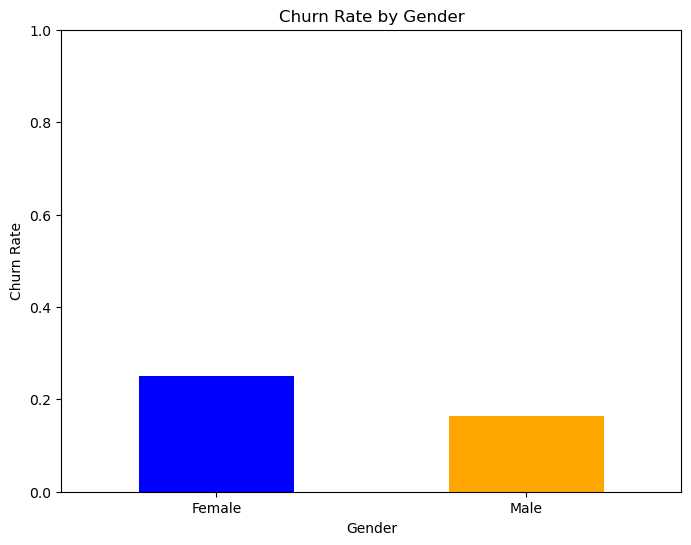

In [558]:
churn_rate = bnk.groupby('gender')['churn'].mean()

plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)  
plt.show()

In [559]:
print(bnk.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [560]:
encoder=OneHotEncoder(sparse=False)
encoded_arr=encoder.fit_transform(np.array(bnk['country']).reshape(-1,1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [561]:
encoded_arr

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [562]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [563]:
x=pd.DataFrame(data=encoded_arr)

In [564]:
x

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [565]:
x.rename(columns={0:'France',1:'Germany'}, inplace=True)

In [566]:
x.drop(columns={2})

,France,Germany
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,0.0,1.0


In [567]:
bnk.drop(columns={'country'})

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [568]:
bnk=bnk.join(x)

In [569]:
bnk.drop(columns={2},inplace=True)

In [570]:
bnk.drop(columns={'country'},inplace=True)

In [571]:
bnk

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,1.0,0.0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0


In [572]:
encoded_arr=encoder.fit_transform(np.array(bnk['gender']).reshape(-1,1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [573]:
encoded_arr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [574]:
encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [575]:
x= pd.DataFrame(data=encoded_arr)

In [576]:
x

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,0.0,1.0
9997,1.0,0.0
9998,0.0,1.0


In [577]:
x.rename(columns={0:'Female'},inplace=True)

In [578]:
x.drop(columns={1}, inplace=True)

In [579]:
bnk=bnk.join(x)

In [580]:
bnk.drop(columns={'gender'},inplace=True)

In [581]:
bnk.set_index('customer_id', inplace=True)

In [582]:
contingency_table = pd.crosstab(bnk['Female'], bnk['churn'])
contingency_table

churn,0,1
Female,,
0.0,4559,898
1.0,3404,1139


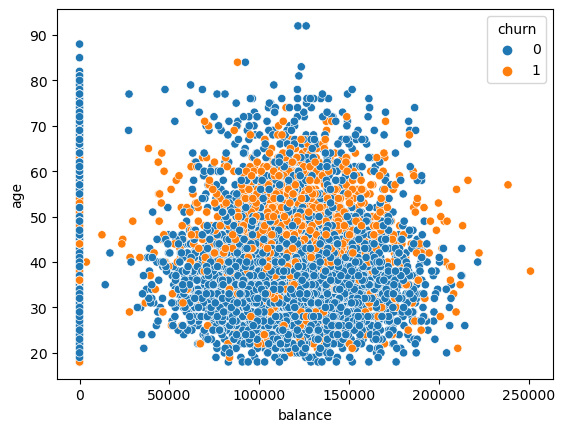

churn,0,1
age,,
18,20,2
19,26,1
20,38,2
21,50,3
22,72,12
...,...,...
83,1,0
84,1,1
85,1,0


In [583]:
contingency_table = pd.crosstab(bnk['age'], bnk['churn'])


sns.scatterplot(x=bnk['balance'], y=bnk['age'], hue=bnk.churn)
plt.show()
contingency_table

In [584]:
bnk.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Female
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.002857
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,0.027544
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,-0.014733
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.012087
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.021859
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.005766
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,-0.022544
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,0.008112
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,0.106512
France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.006772


<Axes: >

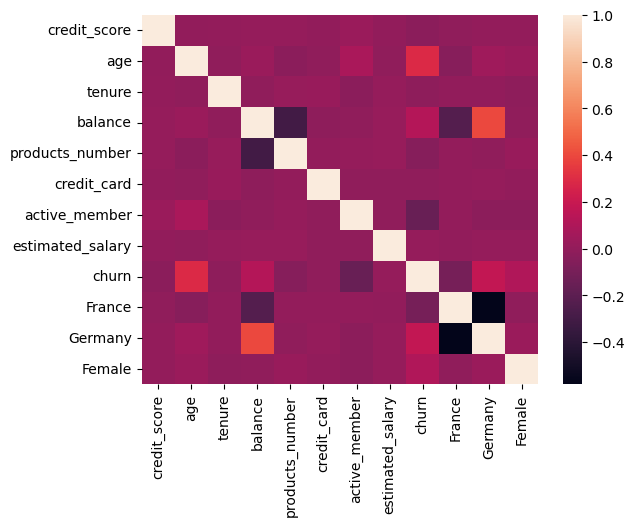

In [585]:
sns.heatmap(bnk.corr())

In [586]:
bnk_label=pd.DataFrame(bnk['churn'])
bnk_features=pd.DataFrame(bnk[['credit_score','age','tenure',	'balance','products_number','credit_card','active_member','estimated_salary','France','Germany','Female'
]])

In [587]:
bnk_label,bnk_features

(             churn
 customer_id       
 15634602         1
 15647311         0
 15619304         1
 15701354         0
 15737888         0
 ...            ...
 15606229         0
 15569892         0
 15584532         1
 15682355         1
 15628319         0
 
 [10000 rows x 1 columns],
              credit_score  age  tenure    balance  products_number  \
 customer_id                                                          
 15634602              619   42       2       0.00                1   
 15647311              608   41       1   83807.86                1   
 15619304              502   42       8  159660.80                3   
 15701354              699   39       1       0.00                2   
 15737888              850   43       2  125510.82                1   
 ...                   ...  ...     ...        ...              ...   
 15606229              771   39       5       0.00                2   
 15569892              516   35      10   57369.61                1   
 

In [588]:
bnk_features

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Female
customer_id,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,1.0
15647311,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
15619304,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,1.0
15701354,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,1.0
15737888,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
15569892,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
15584532,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,1.0


In [589]:
bnk_features['Germany'].unique()

array([0., 1.])

In [590]:
scaler=StandardScaler()
bnk_feat_scaled=scaler.fit_transform(bnk_features)

In [591]:
n=0
for x in bnk_feat_scaled[:,-1]:
    n+=1
print(n)

10000


In [592]:
x_train, x_test, y_train, y_test = train_test_split(bnk_feat_scaled, bnk_label , test_size=0.2, random_state=42)

In [593]:
x_train, y_train

(array([[ 0.36701255, -0.66001848,  0.34135195, ...,  0.99720391,
         -0.57873591, -0.91241915],
        [-0.19171334,  0.29351742, -0.35020386, ..., -1.00280393,
          1.72790383, -0.91241915],
        [-0.94702796, -1.42284721, -0.69598177, ..., -1.00280393,
         -0.57873591, -0.91241915],
        ...,
        [ 0.87400456, -0.08789694, -1.38753759, ...,  0.99720391,
         -0.57873591,  1.09598752],
        [ 0.17042381,  0.38887101,  1.03290776, ...,  0.99720391,
         -0.57873591, -0.91241915],
        [ 0.48082708,  1.15169974, -1.38753759, ..., -1.00280393,
          1.72790383, -0.91241915]]),
              churn
 customer_id       
 15601116         0
 15766374         0
 15716994         1
 15730759         1
 15797900         1
 ...            ...
 15596647         0
 15681075         0
 15573851         1
 15807663         1
 15706268         0
 
 [8000 rows x 1 columns])

In [594]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {
    'alpha': [0.01, 0.015,0.05]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train,y_train)

# Retrieve the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")



Best alpha value: 0.01


In [595]:
if hasattr(grid_search, 'best_params_'):
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha value: {best_alpha}")

    # Predict on the test set and evaluate
    y_pred = grid_search.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
else:
    print("GridSearchCV did not fit successfully or best_params_ is not available")


Best alpha value: 0.01
Mean Squared Error: 0.13370067627420174


In [596]:
x_train
lasso = Lasso(alpha=0.01)

In [597]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [598]:
lasso.coef_ # bnk_features, bnk_feat_scaled


array([-0.        ,  0.10626849, -0.        ,  0.01464775, -0.00140381,
       -0.        , -0.06068626,  0.        , -0.        ,  0.04605286,
        0.0280756 ])

In [599]:
bnk_feat_scaled=lasso.coef_*bnk_feat_scaled

In [600]:
bnk_feat_scaled

array([[ 0.        ,  0.03119165,  0.        , ..., -0.        ,
        -0.02665244,  0.03077051],
       [ 0.        ,  0.02105857,  0.        , ...,  0.        ,
        -0.02665244,  0.03077051],
       [ 0.        ,  0.03119165, -0.        , ..., -0.        ,
        -0.02665244,  0.03077051],
       ...,
       [-0.        , -0.02960684, -0.        , ..., -0.        ,
        -0.02665244,  0.03077051],
       [-0.        ,  0.03119165,  0.        , ...,  0.        ,
         0.07957491, -0.02561672],
       [-0.        , -0.1106715 ,  0.        , ..., -0.        ,
        -0.02665244,  0.03077051]])

In [601]:
columns=["credit_score"	,"gender",	"age",	"tenure",	"balance",	"products_number",	"credit_card",	"active_member",	"estimated_salary",	"France",	"Germany"]

a = {i: columns[i] for i in range(len(columns))}


a

{0: 'credit_score',
 1: 'gender',
 2: 'age',
 3: 'tenure',
 4: 'balance',
 5: 'products_number',
 6: 'credit_card',
 7: 'active_member',
 8: 'estimated_salary',
 9: 'France',
 10: 'Germany'}

In [602]:
hel=pd.DataFrame(bnk_feat_scaled)
hel.rename(columns=a, inplace=True)
hel=hel.drop(columns={"credit_score","age","products_number","active_member","estimated_salary"})


In [603]:
x_train, x_test, y_train, y_test = train_test_split(hel, bnk_label , test_size=0.2, random_state=42)

In [604]:
# result = lasso.coef_ * unique_values
# print("Result of Multiplication:", result)

In [605]:
hel['Germany'].unique()


array([ 0.03077051, -0.02561672])

In [606]:
feats

array([[ 0.03119165, -0.01795591,  0.00127969, -0.05888039, -0.02665244,
         0.03077051],
       [ 0.02105857,  0.00171891,  0.00127969, -0.05888039, -0.02665244,
         0.03077051],
       [ 0.03119165,  0.01952623, -0.00354751,  0.06254751, -0.02665244,
         0.03077051],
       ...,
       [-0.02960684, -0.01795591,  0.00127969, -0.05888039, -0.02665244,
         0.03077051],
       [ 0.03119165, -0.00033115, -0.00113391,  0.06254751,  0.07957491,
        -0.02561672],
       [-0.1106715 ,  0.01259655,  0.00127969,  0.06254751, -0.02665244,
         0.03077051]])

In [607]:
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(bnk_feat_scaled)


In [608]:
#pca_data

In [609]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,verbose=1,random_state=42)

In [696]:
kmeans.fit(x_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 145.35459275492144.
Iteration 1, inertia 103.60298823838363.
Iteration 2, inertia 95.6820816983427.
Iteration 3, inertia 91.93199510536766.
Iteration 4, inertia 90.15298444262834.
Iteration 5, inertia 89.30561409307292.
Iteration 6, inertia 88.92880670992967.
Iteration 7, inertia 88.69348028841038.
Iteration 8, inertia 88.64294101999474.
Iteration 9, inertia 88.55203615740064.
Iteration 10, inertia 88.53957231664234.
Iteration 11, inertia 88.53545046265272.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 146.4057859105065.
Iteration 1, inertia 94.82091902539106.
Iteration 2, inertia 91.04630914488209.
Iteration 3, inertia 89.76270185859713.
Iteration 4, inertia 89.13481775314325.
Iteration 5, inertia 88.7556140837268.
Iteration 6, inertia 88.64395915574013.
Iteration 7, inertia 88.55203615740064.
Iteration 8, inertia 88.53957231664234.
Iteration 9, inertia 88.53545046265272.
Converged at iteration 

KMeans(n_clusters=2, random_state=42, verbose=1)

In [699]:
y_pred=kmeans.predict(x_test)
accuracy_score(y_test,y_pred)

0.7675

In [611]:
Cluster_Without_Scaling = kmeans.predict(bnk_feat_scaled)

In [612]:
pd.Series(Cluster_Without_Scaling).unique()

array([1, 0], dtype=int32)

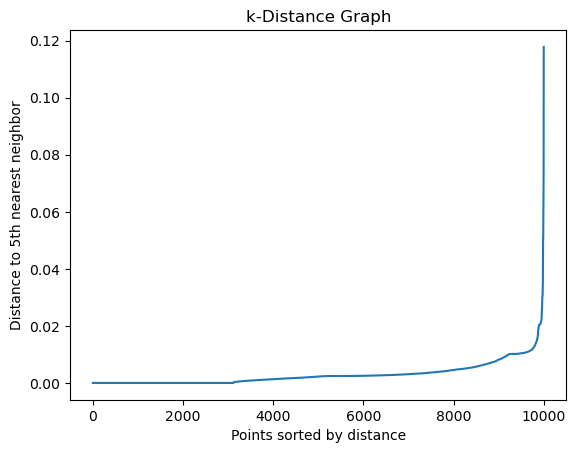

In [613]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors distance
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(bnk_feat_scaled)
distances, indices = neighbors_fit.kneighbors(bnk_feat_scaled)

# Sort distances
distances = np.sort(distances[:, 4], axis=0)

# Plot k-distance graph
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-Distance Graph')
plt.show()

In [689]:
dbscan=DBSCAN(eps=0.2,min_samples=20)
db_data=dbscan.fit(bnk_feat_scaled)
db_results=dbscan.labels_

In [690]:
dbscan.fit(x_test)
y_pred_db=dbscan.labels_

In [691]:
accuracy_score(y_test,y_pred_db)
balanced_accuracy_score(y_test,y_pred_db)
r2_score(y_test,y_pred_db)

-0.2445550715619167

In [692]:
bnk

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


NameError: name 'pca_data' is not defined

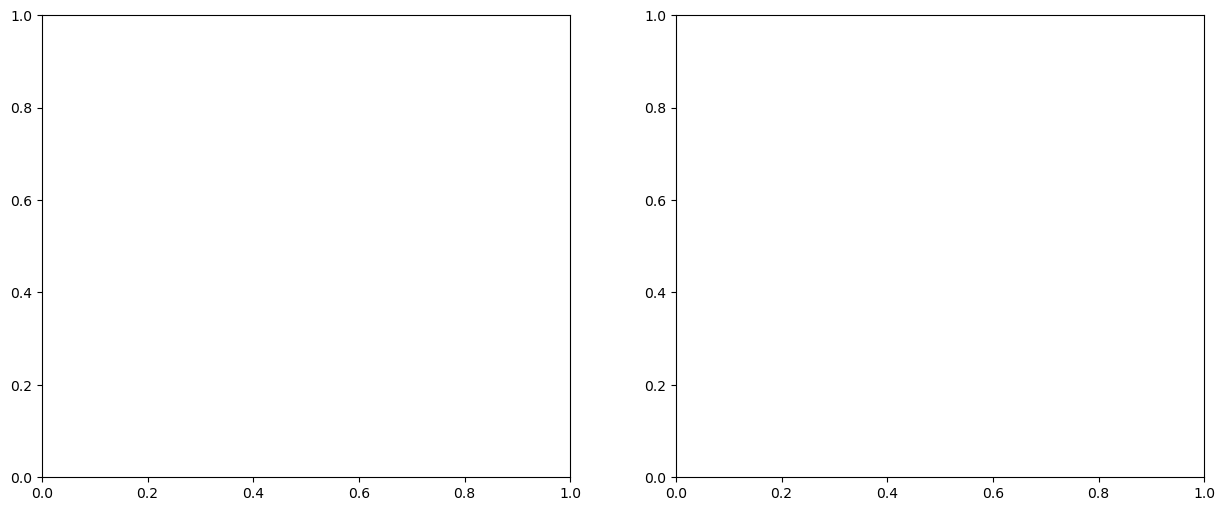

In [715]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
import plotly.express as px

fig = px.scatter(x=pca_data[:, 0], y=pca_data[:, 1], color=labels, labels={'color': 'Cluster'})
fig.update_layout(title='Interactive Clustering Plot with PCA')
fig.show()
sns.scatterplot(x=bnk['age'], y=bnk['estimated_salary'], hue=Cluster_Without_Scaling, palette='viridis', ax=axes[0])
axes[0].scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=300, 
    c='red', 
    label='Centroids'
)
axes[1].set_title('KMeans')
axes[1].legend()
#plt.savefig('hello.jpg')



sns.scatterplot(x=bnk['age'], y=bnk['estimated_salary'], hue=db_results, palette='viridis', ax=axes[1])
#axes[1].scatter(
    #dbscan.cluster_centers_[:, 0], 
    #dbscan.cluster_centers_[:, 1], 
    #s=300, 
    #c='red', 
    #label='Centroids'
#)
axes[1].set_title('DBSCAN')
axes[1].legend()
plt.savefig('hello.jpg')

plt.show()



In [619]:
from sklearn.metrics import confusion_matrix
confusion_matrix(bnk['churn'],Cluster_Without_Scaling)

array([[1591, 6372],
       [1150,  887]])

In [620]:
from sklearn.metrics import accuracy_score

In [621]:
accuracy_score(bnk['churn'],Cluster_Without_Scaling)

0.2478

In [622]:
db_results

array([0, 0, 0, ..., 0, 0, 0])

In [623]:

rfc=RandomForestClassifier()

In [624]:
y_train=np.array(y_train.reset_index(drop=True))
y_test=np.array(y_test.reset_index(drop=True))

In [625]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(400,700,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [12,13,14],
              'max_samples': [0.3,0.5,0.6]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(x_train, y_train.ravel())
model = model.best_estimator_


In [626]:
model

RandomForestClassifier(max_depth=12, max_features=0.30000000000000004,
                       max_samples=0.3, n_estimators=490)

In [627]:
y_pred=model.predict(x_test)

In [628]:
accuracy_score(y_test,y_pred)

0.863

In [629]:
# plt.figsize()
confusion_matrix(y_test,y_pred)

array([[1537,   70],
       [ 204,  189]])

In [630]:
from sklearn.metrics import balanced_accuracy_score 

In [631]:
balanced_accuracy_score(y_test,y_pred)
r2_score(y_test,y_pred)

0.13229493738431253

In [632]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [646]:
xgbc= XGBClassifier(objective='binary:logistic')


In [647]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [648]:
y_pred_xg=xgbc.predict(x_test)

In [649]:
accuracy_score(y_test,y_pred_xg)

0.858

In [637]:
balanced_accuracy_score(y_test,y_pred_xg)

0.7203725431517012

In [638]:
param_grid = {
    'n_estimators': [89],
    'max_depth': [3],
    'learning_rate': [0.097],
    'objective':['binary:logistic']
}
xgbc=XGBClassifier()


grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='accuracy')


grid_search.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.097], 'max_depth': [3],
                         'n_estimators': [89],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [701]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train model with best parameters
best_model = grid_search.best_estimator_

y_pred_yg=best_model.predict(x_test)

Best Parameters: {'learning_rate': 0.097, 'max_depth': 3, 'n_estimators': 89, 'objective': 'binary:logistic'}


In [702]:
accuracy_score(y_test,y_pred_yg)

0.8645

In [700]:
import pickle as pkl

In [705]:
pkl.dump(best_model, 'model','wb')

TypeError: 'str' object cannot be interpreted as an integer

In [707]:
with open('model.pkl', 'wb') as file:
    # Serialize the model to the file
    pkl.dump(best_model, file)

In [708]:
import pandas as pd

# Sample data
data = {
    'customer_id': [1, 2, 3],
    'signup_datetime': ['2023-07-22 14:30:45', '2023-07-21 11:15:00', '2023-07-20 08:00:00']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert signup_datetime to datetime
df['signup_datetime'] = pd.to_datetime(df['signup_datetime'])

# Extract date and time separately
df['signup_date'] = df['signup_datetime'].dt.date
df['signup_time'] = df['signup_datetime'].dt.time


In [710]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_time'] = pd.to_datetime(df['signup_time'].astype(str)).dt.time



/var/folders/z6/x0y8188j08b2cdbs0cqf8m3h0000gn/T/ipykernel_88829/2895900934.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_time'] = pd.to_datetime(df['signup_time'].astype(str)).dt.time


In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      3 non-null      int64         
 1   signup_datetime  3 non-null      datetime64[ns]
 2   signup_date      3 non-null      datetime64[ns]
 3   signup_time      3 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 228.0+ bytes


In [712]:
bnk

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
